<a href="https://colab.research.google.com/github/KingBeeM/Code_BackUp/blob/main/plt_by_jehyunlee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spines & Grids
참조 : https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/

- 착시를 줄여주는 축과 격자를 설정하는 방법
- matplotlib 에서는 **Axes.spines** 와 **Axes.grid** 객체를 통해 제어

## 1. 착시
- 우리 눈은 사물을 있는 그래도 보지 않습니다.
 + 주변과 견주어보기도 하고, 우리가 알고 있는 지식에 비추어 보기도 합니다.
 + 이런 과정에서 있는 그대로 보지 못하는 착시가 발생합니다.
- 착시는 생물학적 이유로 발생하기도 하는데 , 예로 Mach Bands 가 있습니다.
 + 선에서 점점 두꺼워지다가 다른 선과 닿는 순간 경계 지점에 그림자가 보입니다.
 + 측면 억제 lateral inhibition 현상. 경계를 명확히 인지하기 위해 이렇게 진화 했을 것으로 추정, 자극을 강하게 맞은 신경 세포는 이웃한 신경세포에 억제성 신경전달 물질을 전달해서 활성화를 억제.
 + 같은 색이라도 다른 색과 접한 부분은 다르게 인식
 + 참고로, 이 현상을 밝힌 Ernst Mach 는 초음속에 대한 연구를 한 그 마하.
</br>

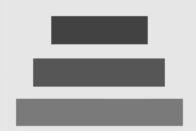

</br>
- 한편으로 인지 방식에 의해 일어나기도 합니다.
 + 우리는 배경에 비추어 물체를 인식하고 크기를 판단하기 때문
 + ponzo Illusion 이 대표적
</br>

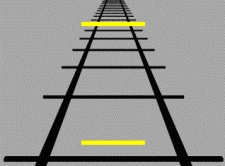

</br>
- 착시는 누구나 겪는 일이지만 간단히 벗어날 수 있습니다.
 + 이미 위 그림에서 선들이 닿기 전에 배경선이 보일 때
 + 그리고 철길 위에 빨간 보조선을 그었을 때
 + 우리는 착시에서 벗어날 수 있다.
- matplotlib 에서는 spines 와 grid 의 도움을 받을 수 있다.

## 2. 윤곽선 (spines)
- matplotlib 에서 부를 이름은 조금 낯설지만 생각해보면 은근 직관적
 + 축공간이라고 부르는 그림이 그려지는 공간은 axes 이고
 + 눈금이 붙는 부분의 이름은 spines
- 데이터 시각화 교과서에서 spine 에 대해 언급이 별로 없음.
 + 보여주고자 하는 데이터의 종류에 따라 다르고
 + 특히 그림의 종류에 따라 적절하게 변형되어 사용
 + 원하는 형식으로 연출 할 수 있도록 기능위주로
- matplotlib 의 object oriented interface 에서, ax.spines 로 제어

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
tips_day = tips.groupby("day").mean().reset_index()
tips_day

<ipython-input-3-f68b51befe55>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips_day = tips.groupby("day").mean().reset_index()


,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


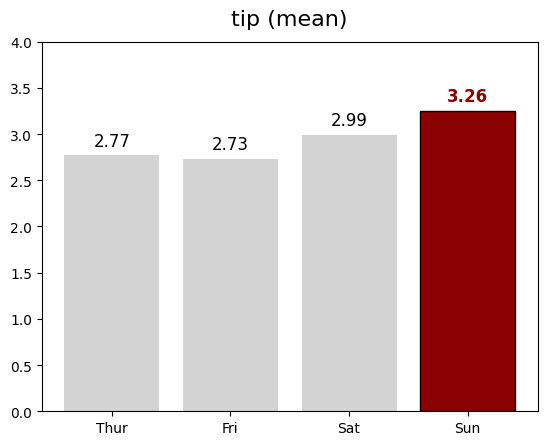

In [24]:
def plot_example(ax, zorder=0):
  ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
  ax.set_title("tip (mean)", fontsize=16, pad=12)

  # values
  h_pad = 0.1
  for i in range(4):
    fontweight = "normal"
    color = "k"
    if i == 3:
      fontweight = "bold"
      color = "darkred"
    
    ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}",
            horizontalalignment="center", fontsize=12, fontweight=fontweight, color=color)
    
  # Sunday
  ax.patches[3].set_facecolor("darkred")
  ax.patches[3].set_edgecolor("black")

  # set_range
  ax.set_ylim(0, 4)

  return ax

fig, ax = plt.subplots()
ax = plot_example(ax)

### spines 의 정체는 ?
- OrderedDict 객체로 dictionary 의 일종
- key 와 value 알아보기
 + "left", "right", "bottom", "top" 으로 네 개의 테두리
 + value 의 정체는 ?
  -> matplotlib.spines.Spine 객체
  -> 공식문서(https://matplotlib.org/3.3.1/api/spines_api.html) 에 따르면 Spine 은 Pathch 의 subclass
  -> set_patch_circle, set_patch_arc 가 호출 되면 원이나호를 그리기도 함
  -> 선을 그리는 set_patch_line 이 디폴트

In [6]:
type(ax.spines)

matplotlib.spines.Spines

In [7]:
for k, v in ax.spines.items():
  print(f"spines[{k}] = {v}")

spines[left] = Spine
spines[right] = Spine
spines[bottom] = Spine
spines[top] = Spine


In [8]:
ax.spines.values()

ValuesView(<matplotlib.spines.Spines object at 0x7fa61408b790>)

## 2.1 spine 숨기기 : .set_visible(False)
- 위 그림에서 맨 아래만 남기고 왼쪽, 위쪽, 오른쪽 spines 를 지워보기
- set_visible(False) 명령어
 + set_visible() 은 spine 에만 적용되는 명령이 아님
 -> General Artist Properties 라고 해서 모든 객체에 적용이 가능
 -> 예로 bar 객체에서도 가능

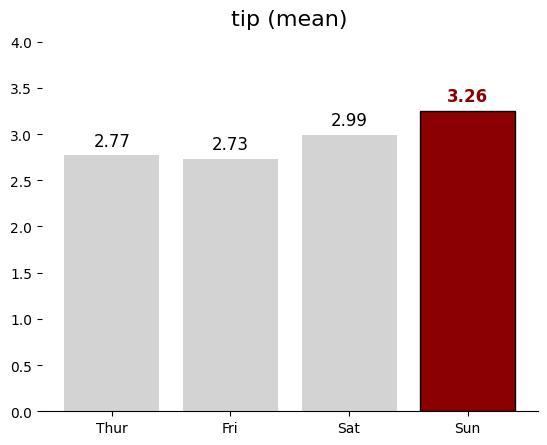

In [26]:
fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

## 2.2 spine 범위 지정하기 : .set_bounds(min, max)
- spine를 일부 영역에만 보여주고 싶을 때
- 왼쪽 spine을 안보이게 하는 대신 가운데만 그려보기
- set_bounds(min, max)

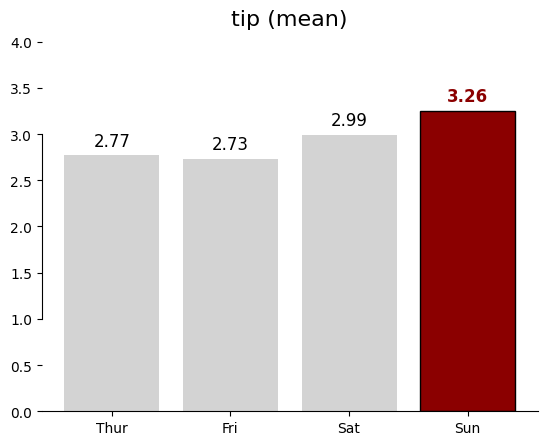

In [27]:
fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_bounds(1, 3)

## 2.3 spine 위치 지정하기 : .set_position((direction, distance))
- 가로와 세로축을 원래 위치에서 밖으로 살짝 밀어 공간을 확보하고 여유를 연출하기
- set_position((directionm distance)) 사용
 + get_position() 을 이용해서 spines["left"] 어덯게 설정되어 있는지 확인
 -> ('outward', 0.0) : 밖으로 0 만큼 나가있다.
 + set_position(("outward", 10)) 을 설정해 조금 간격을 줘보기 

 + "outward" 를 넣을 수 있으니 거꾸로는 "inward" 가 있다?
 -> 거리를 음수로 넣어야함!!
 + "axes", "data" 를 넣을 수 있다.

In [28]:
ax.spines["left"].get_position()

('outward', 0.0)

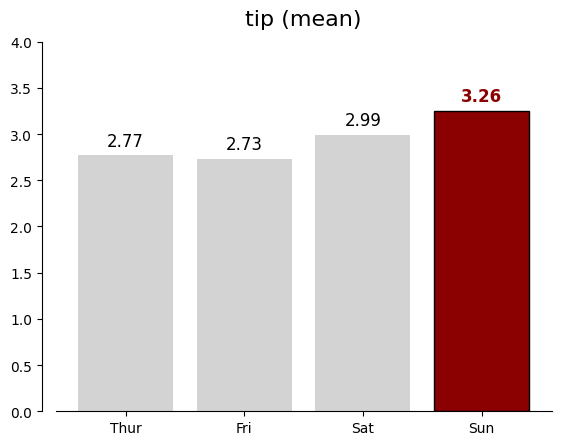

In [29]:
fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))

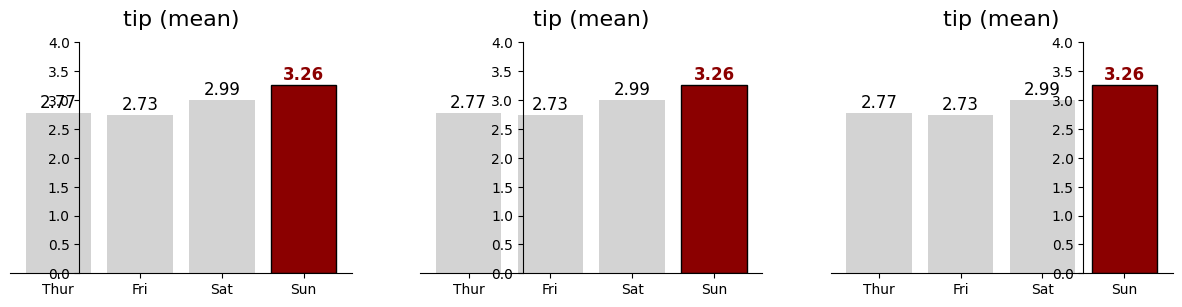

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))

for i in range(3): # 그래프 세개 한번에 그리기
  ax[i] = plot_example(ax[i])
  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)

# ax[0] : spine을 data 영역에서 지정된 거리 만큼 이동
ax[0].spines["left"].set_position(("outward", -50))

# ax[1] : spine을 axes의 지정된 위치에 설정
ax[1].spines["left"].set_position(("axes", 0.3))

# ax[2] : spine을 data의 지정된 위치에 설정
ax[2].spines["left"].set_position(("data", 2.5))

- "axes" 와 "data" 도 음수와 함께 사용 가능
- 수학시간에 많이 보던 그래프 그리는 법
 + set_position(("axes", 0.5)) 대신 set_position("center")
 + set_position(("data", 0.0)) 대신 set_position("zero") 

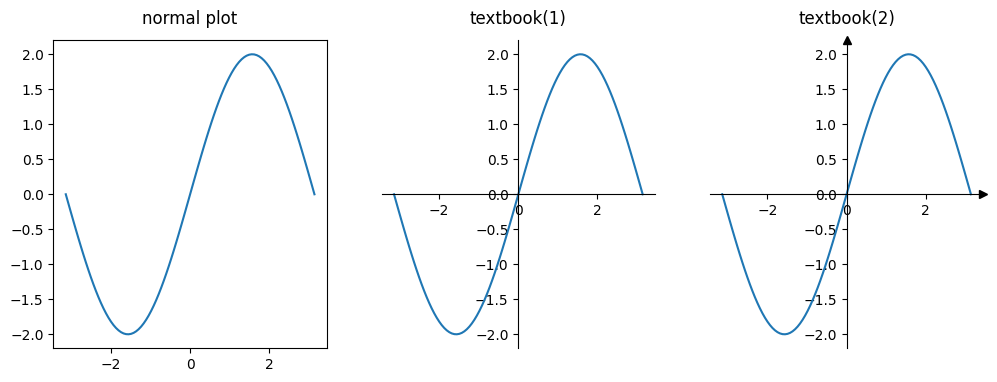

In [38]:
## data
import numpy as np

x = np.linspace(-np.pi, np.pi, 100)
y = 2 * np.sin(x)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

## normal plot
ax[0].plot(x, y)
ax[0].set_title("normal plot", pad=12)

## textbook(1)
ax[1].plot(x, y)
ax[1].set_title("textbook(1)", pad=12)
# top, right 는 안보이게
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
# left, bottom 은 (0, 0) 을 지나가게
ax[1].spines["left"].set_position(("data", 0))
ax[1].spines["bottom"].set_position(("data", 0))

## textbook(2)
ax[2].plot(x, y)
ax[2].set_title("textbook(2)", pad=12)
# top, right 는 안보이게
ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
# left, bottom 은 (0, 0) 을 지나가게
ax[2].spines["left"].set_position(("data", 0))
ax[2].spines["bottom"].set_position(("data", 0))
# 화살표 추가
ax[2].plot(1, 0, ">k", transform=ax[2].get_yaxis_transform(), clip_on=False)
ax[2].plot(0, 1, "^k", transform=ax[2].get_xaxis_transform(), clip_on=False)

plt.show()

## 3. 격자 (grid)
- spines 를 적절히 잡아주면 데이터를 읽기 좋아짐
- 그러나 데이터간 크기를 더 잘 비교하려면 그림에 grid를 깔아두면 좋다.
- .grid(True) 메소드로 격자를 그릴 수 있다.
- axis={"both","x","y"} 인자로 방향을 지정

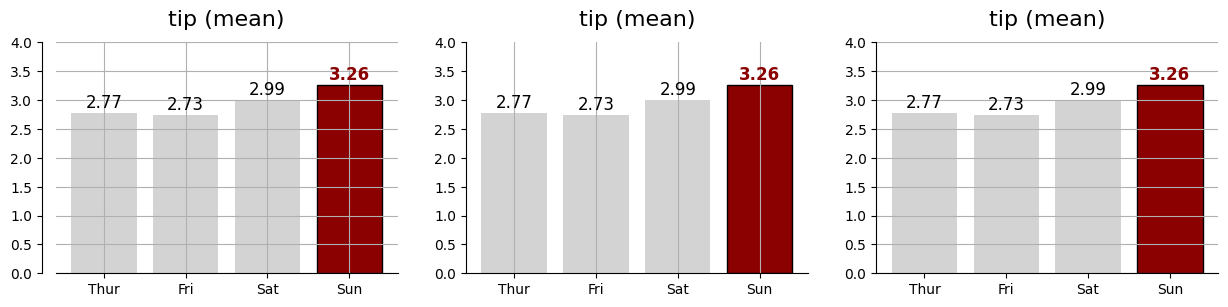

In [43]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))

for i in range(3): # 그래프 세개 한번에 그리기
  ax[i] = plot_example(ax[i])
  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)
  ax[0].spines["left"].set_position(("outward", 10))
  
# ax[0] : x, y 둘 다
ax[0].grid(axis="both")

# ax[1] : x 축만
ax[1].grid(axis="x")

# ax[2] : y 축만
ax[2].grid(axis="y")

### 3.1. major and minor ticks
- grid 는 major 와 minor tick 을 구분하여 그릴 수 있다.

[]

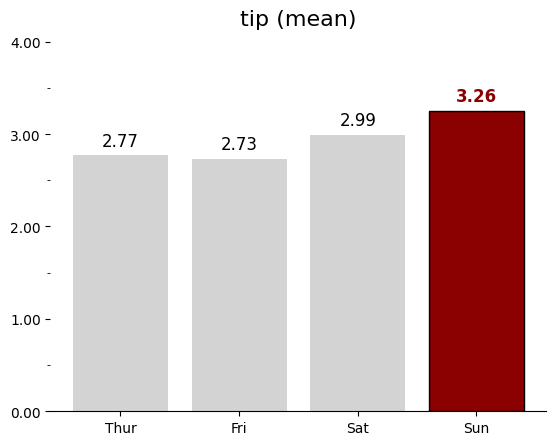

In [47]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots()
ax = plot_example(ax)

# top, right, left spines 안보이기
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# y 축 tick 설정
ax.yaxis.set_major_locator(MultipleLocator(1))    # major tick 을 1 단위로 설정
ax.yaxis.set_major_formatter("{x:0.2f}")          # major tick format 지정 (오류가 나면 matplotlib upgrade)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))  # minor tick 을 0.5 단위로 지정

plt.plot()

### 3.2. major gird only
- major 와 minor ticks 가 구분 되면 한쪽을 선택해서 그릴 수 있다.
- major 와 minor gird 를 구분 해서 지정할 수 있다.
- 따라서 색상이나 선 스타일 등 구분해서 변화가 가능하다.

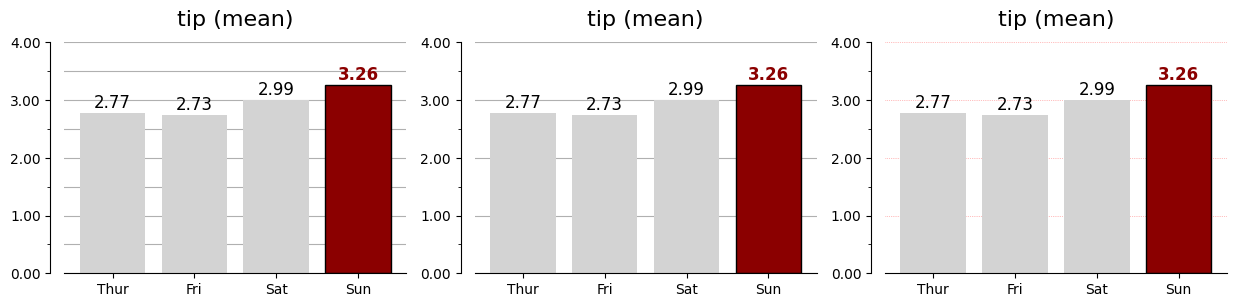

In [48]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))

for i in range(3): 
  ax[i] = plot_example(ax[i], zorder=2) # zorder : bar 를 grid 앞으로
  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)
  ax[i].spines["left"].set_position(("outward", 10))
  ax[i].yaxis.set_major_locator(MultipleLocator(1))
  ax[i].yaxis.set_major_formatter("{x:0.2f}")
  ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))

# ax[0] : major, minor 둘 다
ax[0].grid(axis="y", which="both")

# ax[1] : major 만
ax[1].grid(axis="y", which="major")

# ax[2] : major 만 + 여러 옵션
ax[2].grid(axis="y", which="major", color="r", ls=":", lw=0.5, alpha=0.5)

plt.show()

### 최종 디자인(by_jehyunlee)
- 최종적으로 다음과 같은 결과물을 얻을 수 있다.
- 불필요한 spine 제거 해서 시선 분산을 막고
- grid 를 추가해서 데이터들을 옆에 있는 숫자들과 비교하기 좋게 했다.

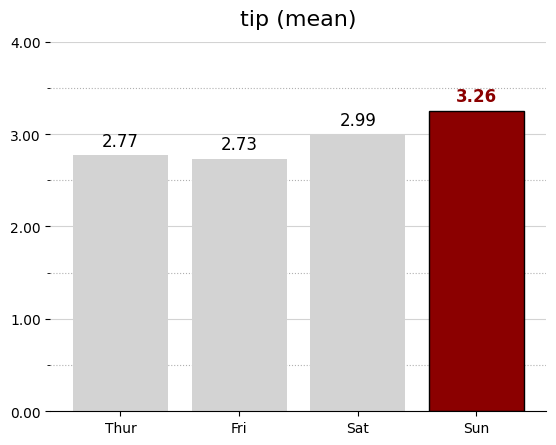

In [52]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter("{x:0.2f}")
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.grid(axis="y", which="major", color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

## 제현쌤 따라하기

### tips 데이터 불러오기기

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.image import imread
from google.colab import drive

drive.mount("/content/drive")
DATA_PATH = "/content/drive/MyDrive/2023/YS/Python_Colab/Data/"

tips = sns.load_dataset("tips")
tips

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 파생 데이터 만들기

In [175]:
tips_day = tips.groupby("day").mean().reset_index()
tips_day["day"] = ["Thursday", "Friday", "Saturday", "Sunday"]
tips_day

<ipython-input-175-d92cdf50d75b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips_day = tips.groupby("day").mean().reset_index()


,day,total_bill,tip,size
0,Thursday,17.682742,2.771452,2.451613
1,Friday,17.151579,2.734737,2.105263
2,Saturday,20.441379,2.993103,2.517241
3,Sunday,21.410000,3.255132,2.842105


In [228]:
def plot_tip(ax, zorder=0):
  ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
  ax.set_title("tip(mean)", fontsize=16, pad=12)

  h_pad = 0.1
  max_idx = 0
  min_idx = 0
  

  for i in range(len(tips_day)):
    fontweight = "normal"
    color = "k"

    if tips_day["tip"].values[i] == max(tips_day["tip"]):
      fontweight = "bold"
      color = "darkred"
      max_idx = i

    if tips_day["tip"].values[i] == min(tips_day["tip"]):
      fontweight = "bold"
      color = "darkblue"
      min_idx = i

    ax.text(i, tips_day["tip"].values[i] + h_pad, f"{tips_day['tip'].values[i]:0.2f}",
            horizontalalignment="center", fontsize=12, fontweight=fontweight,color=color)

  ax.patches[max_idx].set_facecolor("darkred")
  ax.patches[max_idx].set_edgecolor("black")

  ax.patches[min_idx].set_facecolor("darkblue")
  ax.patches[min_idx].set_edgecolor("black")

  
  ax.set_xlabel("day of week")
  ax.set_ylabel("tip($)")
  ax.set_ylim(0, 4)

  return ax

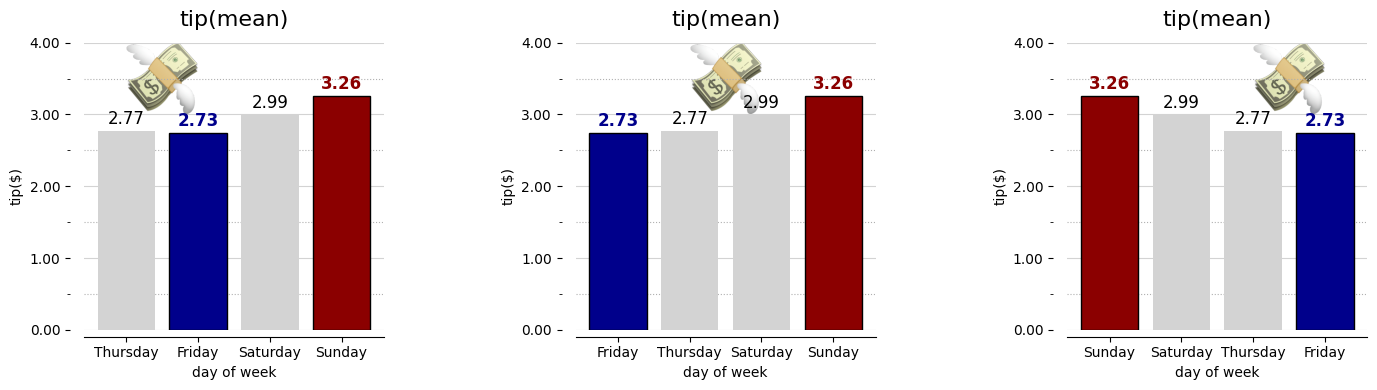

In [232]:
img = plt.imread(DATA_PATH + "img.webp")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i in range(3):
  if i == 0:
    tips_day = tips_day.sort_index()
  if i == 1:
    tips_day = tips_day.sort_values(by = "tip")
  if i == 2:
    tips_day = tips_day.sort_values(by = "tip", ascending = False)

  ax[i].imshow(img, extent = [i, i+1, 3, 4])
  ax[i] = plot_tip(ax[i], zorder=2)

  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)
  ax[i].spines["left"].set_visible(False)
  ax[i].spines["left"].set_position(("outward", 10))
  ax[i].spines["bottom"].set_position(("outward", 5))

  ax[i].yaxis.set_major_locator(MultipleLocator(1))
  ax[i].yaxis.set_major_formatter("{x:0.2f}")
  ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))

  ax[i].grid(axis="y", which="major", color="lightgray")
  ax[i].grid(axis="y", which="minor", ls=":")

plt.tight_layout()
plt.show()